This notebook aims to determine the potential of the teams qualified for the QATAR 2022 World Cup based on the FIFA 22 player statistics.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
FIFA22 = pd.read_csv(r'C:\Users\hp\Downloads\QATAR_2022_Prediction-master\QATAR_2022_Prediction-master\data\players_22.csv')
FIFA22.shape

(19239, 110)

In [3]:
interesting_columns = ['short_name', 'age', 'nationality_name', 'overall', 'potential', 'club_name', 'value_eur', 'wage_eur', 'player_positions']
FIFA22 = pd.DataFrame(FIFA22, columns=interesting_columns)
FIFA22.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   short_name        19239 non-null  object 
 1   age               19239 non-null  int64  
 2   nationality_name  19239 non-null  object 
 3   overall           19239 non-null  int64  
 4   potential         19239 non-null  int64  
 5   club_name         19178 non-null  object 
 6   value_eur         19165 non-null  float64
 7   wage_eur          19178 non-null  float64
 8   player_positions  19239 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.3+ MB


In [4]:
FIFA22.head(5)

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"


# DATA PREPARATION
- I filter the teams that will participate in the world cup and eliminate the others.

- To make things simpler, I select the first position from list as preferred and save it in 'Position' column.

In [5]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
FIFA22['Position'] = FIFA22['player_positions'].str.split(",").str[0]
FIFA22 = FIFA22[["short_name", "age", "nationality_name", 'overall', 'potential', "club_name", "Position", "value_eur", "wage_eur"]]
FIFA22 = FIFA22[(FIFA22["nationality_name"].apply(lambda x: x in list_2022))]
FIFA22['nationality_name'].unique()

array(['Argentina', 'Poland', 'Portugal', 'Brazil', 'Belgium', 'France',
       'Germany', 'England', 'Korea Republic', 'Netherlands', 'Senegal',
       'Spain', 'Uruguay', 'Costa Rica', 'Croatia', 'Denmark',
       'Switzerland', 'Serbia', 'Morocco', 'Mexico', 'Cameroon', 'Ghana',
       'Wales', 'USA', 'Canada', 'Japan', 'Ecuador', 'IR Iran',
       'Australia', 'Tunisia', 'Saudi Arabia'], dtype=object)

In [6]:
FIFA22.head(5)

,short_name,age,nationality_name,overall,potential,club_name,Position,value_eur,wage_eur
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,RW,78000000.0,320000.0
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,ST,119500000.0,270000.0
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,ST,45000000.0,270000.0
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,LW,129000000.0,270000.0
4,K. De Bruyne,30,Belgium,91,91,Manchester City,CM,125500000.0,350000.0


# ANALYSIS

### Top 20 players overall

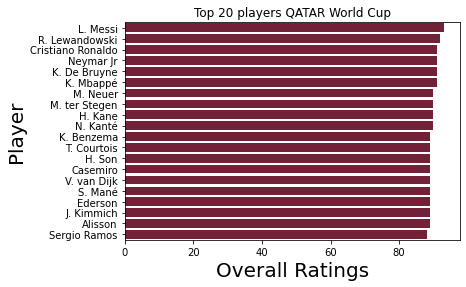

In [7]:
Overall = FIFA22["overall"]
footballer_name = FIFA22["short_name"]

x = FIFA22['short_name'].head(20) 
y = FIFA22['overall'].head(20)

# plot

ax= sns.barplot(x=y, y=x, color="#7F1431", orient='h')
plt.xlabel('Overall Ratings', size=20) 
plt.ylabel('Player', size=20) 
plt.title('Top 20 players QATAR World Cup')

plt.show()

### Best Squad Analysis

In [8]:
def get_best_squad(formation):
    FIFA22_copy = FIFA22.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            # this line returns the index of the player with max rating in that particular position. then age, clubname, wage etc are also extracted of the same player 
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['short_name'].to_string(index=False), 
            FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['age'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['club_name'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['value_eur'].to_string(index=False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax()]]['wage_eur'].to_string(index=False)
        ])
        # the selected player is removed from the list of players so that the same player cannot be selected for the same positions (example: 2 CB)
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'] == i]['overall'].idxmax(), 
                         inplace=True)
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'short_name', 'overall', 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

**Best 4-3-3**

In [9]:
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
      RW            L. Messi      93  34 Paris Saint-Germain  78000000.0 320000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      LW           Neymar Jr      91  29 Paris Saint-Germain 129000000.0 270000.0


**Best 4-4-2**

In [10]:
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
      RM           J. Sancho      87  21   Manchester United 116500000.0 150000.0
      CM        K. De Bruyne      91  30     Manchester City 125500000.0 350000.0
      CM            T. Kroos      88  31      Real Madrid CF  75000000.0 310000.0
      LM              H. Son      89  28   Tottenham Hotspur 104000000.0 220000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0
      ST   Cristiano Ronaldo      91  36   Manchester United  45000000.0 270000.0


**Best 4-2-3-1**

In [11]:
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position          short_name overall age           club_name   value_eur wage_eur
      GK            M. Neuer      90  35   FC Bayern München  13500000.0  86000.0
      RB T. Alexander-Arnold      87  22           Liverpool 114000000.0 150000.0
      CB         V. van Dijk      89  29           Liverpool  86000000.0 230000.0
      CB        Sergio Ramos      88  35 Paris Saint-Germain  24000000.0 115000.0
      LB          Jordi Alba      86  32        FC Barcelona  47000000.0 200000.0
     CDM            N. Kanté      90  30             Chelsea 100000000.0 230000.0
     CDM            Casemiro      89  29      Real Madrid CF  88000000.0 310000.0
     CAM     Bruno Fernandes      88  26   Manchester United 107500000.0 250000.0
     CAM           T. Müller      87  31   FC Bayern München  66000000.0 140000.0
     CAM      Bernardo Silva      86  26     Manchester City  80000000.0 200000.0
      ST      R. Lewandowski      92  32   FC Bayern München 119500000.0 270000.0


### Top 10 Promising Teams QATAR World Cup
I define a function to find the best formation of each national team and its potential. Also, a function to summarize the team.

In [12]:
def get_best_squad_n(formation, nationality, measurement = 'overall'):
    FIFA22_copy = FIFA22.copy()
    FIFA22_copy = FIFA22_copy[FIFA22_copy['nationality_name'] == nationality]
    store = []
    for i in formation:
        store.append([
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['short_name'].to_string(index = False), 
            FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].max(),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['age'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['club_name'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['value_eur'].to_string(index = False),
            FIFA22_copy.loc[[FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax()]]['wage_eur'].to_string(index = False)
        ])    
        FIFA22_copy.drop(FIFA22_copy[FIFA22_copy['Position'].str.contains(i)][measurement].idxmax(),inplace = True)
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7),columns = ['Position', 'short_name', measurement, 'age', 'club_name', 'value_eur', 'wage_eur']).to_string(index = False)

In [13]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []
    for i in nationality_list:
        count = 0
        for j in squad_list:
            try:
                # for overall rating
                O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'overall')
                # for potential rating & corresponding value
                P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'potential')
                summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
                count += 1
            except:
                count += 1  
    return summary

In [14]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [15]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

Initially, I want to see if the complete information is there (i.e., the overall and the potential of the 32 teams of QATAR 2022)

In [16]:
# we are making a new dataframe with overall and potential ratings
country = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, list_2022)).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
country.set_index('nationality_name', inplace = False)
country[['overall', 'potential']] = country[['overall', 'potential']].astype(float)

In [17]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
miss = list_2022
miss = [item if item not in country.nationality_name.values else False for item in miss]
for item in miss:
    if(type(item) == str):
        print(item)

Qatar
Tunisia


Qatar and Tunisia do not have enough information to calculate the overall and the potential of the templates, therefore, I assign the average to Qatar since it is the Local selection. On the other hand, Tunisia has less potential.

In [18]:
# Fixing Qatar and Tunisia na's
Qatar = {'nationality_name':'Qatar', 'Squad':'4-3-3'}
Tunisia = {'nationality_name':'Tunisia', 'Squad':'4-3-3', 'overall':73.0, 'potential':76.0}
country = country.append(Qatar, ignore_index=True)
country = country.append(Tunisia, ignore_index=True)
country['overall'] = country["overall"].transform(lambda x: x.fillna(x.mean()))
country['potential'] = country["potential"].transform(lambda x: x.fillna(x.mean()))
country = country.drop(['Squad'],axis=1)
country = country.sort_values(['nationality_name','potential'],ascending=[True,False])
country_final = country.groupby('nationality_name').first().sort_values('potential', ascending=False)[0:32].reset_index() 

In [19]:
# Exporting overall and potential of QATAR 2022 Teams
country_final.to_csv(r"C:\Users\hp\Downloads\QATAR_2022_Prediction-master\QATAR_2022_Prediction-master\data\squad_stats.csv", index=False)


**Table** - Top 10 Promising Teams

In [20]:
country_top10 = country.groupby('nationality_name').first().sort_values('potential',ascending=False)[0:10].reset_index()
country_top10

,nationality_name,overall,potential
0,France,85.55,89.18
1,England,85.18,89.00
2,Spain,85.55,88.36
3,Brazil,85.64,88.09
4,Portugal,85.00,88.00
5,Germany,85.00,87.55
6,Netherlands,83.36,87.00
7,Argentina,83.73,86.18
8,Belgium,83.45,85.55
9,Uruguay,80.55,84.64


**Graph** - Top 10 Promising Teams

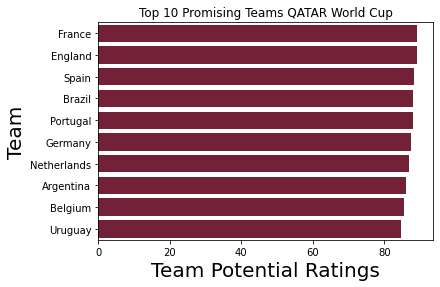

In [21]:
x = country_top10['nationality_name']
y = country_top10['potential']

# plot
ax= sns.barplot(x=y, y=x, color="#7F1431", orient='h')
plt.xlabel('Team Potential Ratings', size = 20) 
plt.ylabel('Team', size = 20 ) 
plt.title('Top 10 Promising Teams QATAR World Cup')

plt.show()

### Detailed analysis of some of the best teams

**France :**

In [22]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = False)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)
France

,Nationality,Squad,Overall,Potential
0,France,3-4-3,85.55,89.18
1,France,4-4-2,85.73,88.73
2,France,4-3-1-2,86.09,88.91
3,France,4-3-3,85.64,89.09
4,France,4-2-3-1,85.64,89.09


In [23]:
# highest overall rating
rating_4312_FR_Overall, best_list_4312_FR_Overall = get_best_squad_n(squad_4312_strict, 'France', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_FR_Overall))
print(best_list_4312_FR_Overall)
#------------------------------------------------------------------------------------------------------------
rating_343_FR_Potential, best_list_343_FR_Potential = get_best_squad_n(squad_343_strict, 'France', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_343_FR_Potential))
print(best_list_343_FR_Potential)

-Overall-
Average rating: 86.1
Position   short_name overall age           club_name   value_eur wage_eur
      GK    H. Lloris      87  34   Tottenham Hotspur  13500000.0 125000.0
     RWB   N. Mukiele      81  23          RB Leipzig  34500000.0  65000.0
      CB    R. Varane      86  28   Manchester United  68500000.0 180000.0
      CB  P. Kimpembe      83  25 Paris Saint-Germain  45500000.0  90000.0
      LB     L. Digne      84  27             Everton  40500000.0 110000.0
     CDM     N. Kanté      90  30             Chelsea 100000000.0 230000.0
      CM     P. Pogba      87  28   Manchester United  79500000.0 220000.0
     CAM     N. Fekir      84  27 Real Betis Balompié  45000000.0  42000.0
      CF   K. Benzema      89  33      Real Madrid CF  66000000.0 350000.0
      ST    K. Mbappé      91  22 Paris Saint-Germain 194000000.0 230000.0
      ST A. Griezmann      85  30  Atlético de Madrid  53000000.0 220000.0
-Potential-
Average rating: 89.2
Position   short_name potential age 

**Spain :**

In [28]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Spain.set_index('nationality_name', inplace = False)
Spain[['overall', 'potential']] = Spain[['overall', 'potential']].astype(float)
Spain 

,nationality_name,Squad,overall,potential
0,Spain,3-4-3,85.36,88.27
1,Spain,4-4-2,84.82,87.09
2,Spain,4-3-1-2,85.64,87.55
3,Spain,4-3-3,85.55,88.36
4,Spain,4-2-3-1,85.45,88.18


In [29]:
rating_4312_GER_Overall, best_list_4312_GER_Overall = get_best_squad_n(squad_4312_strict, 'Spain', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4312_GER_Overall))
print(best_list_4312_GER_Overall)
#------------------------------------------------------------------------------------------------------------
rating_433_GER_Potential, best_list_433_GER_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_GER_Potential))
print(best_list_433_GER_Potential)

-Overall-
Average rating: 85.6
Position      short_name overall age           club_name  value_eur wage_eur
      GK          De Gea      84  30   Manchester United 28000000.0 120000.0
      RB        Carvajal      85  29      Real Madrid CF 47500000.0 210000.0
      CB    Sergio Ramos      88  35 Paris Saint-Germain 24000000.0 115000.0
      CB      A. Laporte      86  27     Manchester City 77000000.0 185000.0
      LB      Jordi Alba      86  32        FC Barcelona 47000000.0 200000.0
      CM          Thiago      86  30           Liverpool 65000000.0 180000.0
     CDM Sergio Busquets      86  32        FC Barcelona 45000000.0 200000.0
      CM          Parejo      86  32       Villarreal CF 53500000.0  64000.0
     CAM     David Silva      85  35       Real Sociedad 22000000.0  44000.0
      ST   Gerard Moreno      86  29       Villarreal CF 68000000.0  73000.0
      ST      Iago Aspas      84  33    RC Celta de Vigo 27000000.0  46000.0
-Potential-
Average rating: 88.4
Position    

**Argentina :**

In [30]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['nationality_name', 'Squad', 'overall', 'potential'])
Argentina.set_index('nationality_name', inplace = False)
Argentina[['overall', 'potential']] = Argentina[['overall', 'potential']].astype(float)
Argentina

,nationality_name,Squad,overall,potential
0,Argentina,3-4-3,83.18,86.00
1,Argentina,4-4-2,82.45,85.64
2,Argentina,4-3-1-2,83.36,85.91
3,Argentina,4-3-3,83.73,86.18
4,Argentina,4-2-3-1,83.73,86.09


In [31]:
rating_433_ARG_Overall, best_list_433_ARG_Overall = get_best_squad_n(squad_433_strict, 'Argentina', 'overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Overall))
print(best_list_433_ARG_Overall)

rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Overall-
Average rating: 83.7
Position  short_name overall age           club_name  value_eur wage_eur
      GK E. Martínez      84  28         Aston Villa 33500000.0  81000.0
      RB  G. Montiel      78  24          Sevilla FC 21000000.0  23000.0
      CB   C. Romero      82  23   Tottenham Hotspur 41500000.0  51000.0
      CB N. Otamendi      81  33          SL Benfica 12500000.0  18000.0
      LB    M. Acuña      84  29          Sevilla FC 37000000.0  45000.0
     CDM   É. Banega      82  33           Al Shabab 15000000.0  46000.0
     CAM    A. Gómez      85  33          Sevilla FC 33500000.0  51000.0
      CM  R. De Paul      82  27  Atlético de Madrid 35000000.0  68000.0
      RW    L. Messi      93  34 Paris Saint-Germain 78000000.0 320000.0
      ST   S. Agüero      87  33        FC Barcelona 51000000.0 260000.0
      LW  L. Ocampos      83  26          Sevilla FC 39500000.0  46000.0
-Potential-
Average rating: 86.2
Position  short_name potential age                   club_na